In [6]:
# https://datascienceub.medium.com/pointnet-implementation-explained-visually-c7e300139698
import torch
from torch import nn
from torchvision import datasets, transforms
import numpy as np
import logging
import matplotlib.pyplot as plt

In [7]:
# General parameters
NUM_CLASSES = 10
# model hyperparameters
GLOBAL_FEATS = 1024
BATCH_SIZE = 32

In [8]:
# set device to run
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# load dataset
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=False, num_workers=16)
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=16)
device

device(type='cuda')

Text(0.5, 1.0, 'Histogram of amount of points per number')

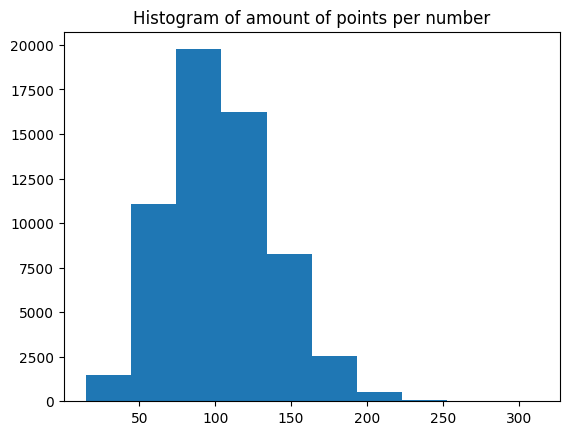

In [12]:
import numpy as np

def transform_img2pc(img):
    img_array = np.asarray(img)
    flat_img_array = img_array.flatten()
    indices = np.argwhere(flat_img_array > 0.5)
    return indices.astype(np.float32)

len_points = []
# for i, (images, labels) in enumerate(trainloader):
#     pc = transform_img2pc(images)
#     len_points.append(len(pc))

# loop over samples
for idx in range(len(trainset)):
    img,label = trainset[idx]
    pc = transform_img2pc(img)
    len_points.append(len(pc))
    
h = plt.hist(len_points)
plt.title('Histogram of amount of points per number')